<h1><center>NLP : Movie Critics</center></h1>
<h2><center>Part 3 : NLP</center></h2>

<center><img src="https://simplonline.co/_next/image?url=https%3A%2F%2Fsimplonline-v3-prod.s3.eu-west-3.amazonaws.com%2Fmedia%2Fimage%2Fjpg%2F1dea9fa5-b2da-4731-925d-b2280a28af3e.jpg&w=1280&q=75" alt="iIllustration" title="title"  style="object-fit:cover; width:800px; height:250px;"/></center>

  
----  
----  


</br>
<center><h2>Working Environment Preparation</h2></center>

In [2]:
# Import Libraries
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from sklearn.metrics import accuracy_score, confusion_matrix

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline

___________

#### Set with notes 3.0 and 3.5

In [317]:
# # Loading set for the NLP with notes 3 and 3.5
# x_train = joblib.load('train_test_split_save_joblib/preprocessing_include.joblib')['x_train']
# y_train = joblib.load('train_test_split_save_joblib/preprocessing_include.joblib')['y_train']

# x_test = joblib.load('train_test_split_save_joblib/preprocessing_include.joblib')['x_test']
# y_test = joblib.load('train_test_split_save_joblib/preprocessing_include.joblib')['y_test']

__Conclusion :__

- TEST SET - Accuracy Score (Params: TD-IDF / LR) :  86.75 %
- TEST SET - Accuracy Score (Params: TD-IDF / BNB) :  61.5 %
- TEST SET - Accuracy Score (Params: TD-IDF / MNB) :  87.08 %  
- TEST SET - Accuracy Score (Params: TD-IDF / SVC) :  87.38 %
- ***TEST SET - Accuracy Score (Voting Classifier) :  87.54 %***

______

#### Set without notes 3.0 and 3.5

In [301]:
# # Loading set for the NLP without notes 3 and 3.5
# x_train = joblib.load('train_test_split_save_joblib/preprocessing_exclude.joblib')['x_train']
# y_train = joblib.load('train_test_split_save_joblib/preprocessing_exclude.joblib')['y_train']

# x_test = joblib.load('train_test_split_save_joblib/preprocessing_exclude.joblib')['x_test']
# y_test = joblib.load('train_test_split_save_joblib/preprocessing_exclude.joblib')['y_test']

__Conclusion :__

- TEST SET - Accuracy Score (Params: TD-IDF / LR) :  89.83 %
- TEST SET - Accuracy Score (Params: TD-IDF / BNB) :  59.83 %
- TEST SET - Accuracy Score (Params: TD-IDF / MNB) :  89.77 %
- ***TEST SET - Accuracy Score (Params: TD-IDF / SVC) :  90.23 %***
- TEST SET - Accuracy Score (Voting Classifier) :  90.23 %

________________

#### Set without lemmatization and spell check - notes 3 and 3.5 exclude

In [380]:
# # Loading set for the NLP without notes 3 and 3.5 + no lemm and no spellcheck
# x_train = joblib.load('train_test_split_save_joblib/preprocessing_no_lem_sc.joblib')['x_train']
# y_train = joblib.load('train_test_split_save_joblib/preprocessing_no_lem_sc.joblib')['y_train']

# x_test = joblib.load('train_test_split_save_joblib/preprocessing_no_lem_sc.joblib')['x_test']
# y_test = joblib.load('train_test_split_save_joblib/preprocessing_no_lem_sc.joblib')['y_test']

__Conclusion :__

- TEST SET - Accuracy Score (Params: TD-IDF / LR) :  91.36 %
- TEST SET - Accuracy Score (Params: TD-IDF / BNB) :  67.75 %
- TEST SET - Accuracy Score (Params: TD-IDF / MNB) :  90.54 %
- ***TEST SET - Accuracy Score (Params: TD-IDF / SVC) :  91.67 %*** -> (params : penalty='l2', loss='hinge', dual=True)
- TEST SET - Accuracy Score (Voting Classifier) :  91.51 %

________________________

#### Set Data Augmentation (24K data - 12K Pos - 12K Neg) : Params : no lemm, no spell check, 3 and 3.5 notes exclude

In [3]:
# Loading set for the NLP without notes 3 and 3.5 + no lemm and no spellcheck
x_train = joblib.load('train_test_split_save_joblib/data_aug_exclude.joblib')['x_train']
y_train = joblib.load('train_test_split_save_joblib/data_aug_exclude.joblib')['y_train']

x_test = joblib.load('train_test_split_save_joblib/data_aug_exclude.joblib')['x_test']
y_test = joblib.load('train_test_split_save_joblib/data_aug_exclude.joblib')['y_test']

__Conclusion :__

- TEST SET - Accuracy Score (Params: TD-IDF / LR) :  93.19 %
- TEST SET - Accuracy Score (Params: TD-IDF / BNB) :  72.96 %
- TEST SET - Accuracy Score (Params: TD-IDF / MNB) :  89.17 %
- TEST SET - Accuracy Score (Params: TD-IDF / SVC) :  93.21 % -> Linear SVC (params : penalty='l2', loss='hinge', dual=True)
- TEST SET - Accuracy Score (Voting Classifier) :  93.17 %
- ***TEST SET - Accuracy Score (Bagging - Linear SVC) :  93.5 %*** -> (params : penalty='l2', loss='hinge', dual=True -n_estimators:100)

  
----  
----  


</br>
<center><h2>NLP Sentiment Analysis : with TD-IDF Vectorization</h2></center>

### Vectorization

In [4]:
# Create a x_train copie for the td-idf vectorization
x_train_tdidf = x_train
x_train_tdidf = x_train_tdidf.apply(lambda x: ' '.join(x))

x_test_tdidf = x_test

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply the TD-IDF Vectorizer
tdidf = TfidfVectorizer(ngram_range=(1, 2))
x_train_tdidf = tdidf.fit_transform(x_train_tdidf)

x_test_tdidf = tdidf.transform(x_test_tdidf)

-----------------------

### Creating and Evaluating Models 

#### Logistic Regression (LR)

TEST SET - Accuracy Score (Params: TD-IDF / LR) :  93.19 %


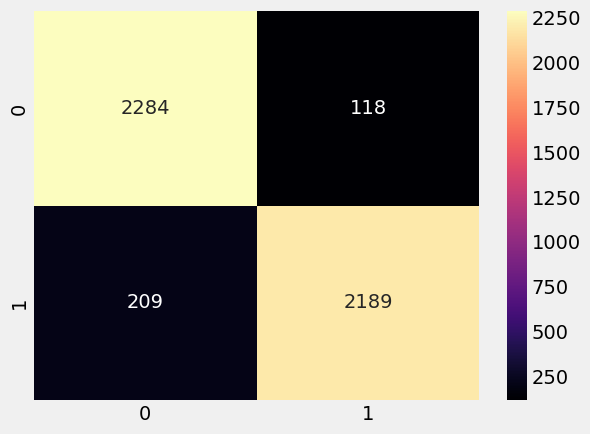

In [5]:
from sklearn.linear_model import LogisticRegression

# Apply the model on x_train
LRmodel = LogisticRegression(C=100, solver='newton-cg', class_weight='balanced')
LRmodel.fit(x_train_tdidf, y_train.astype('int'))

# Apply on the test
y_pred = LRmodel.predict(x_test_tdidf)


# Evaluate the model
acc_score = accuracy_score(y_test.astype('int'), y_pred)
print("TEST SET - Accuracy Score (Params: TD-IDF / LR) : ", round(acc_score * 100, 2),"%" )

cf_matrix = confusion_matrix(y_test.astype('int'), y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='magma', fmt='d');
plt.show()

________________

#### Bernoulli Naive Bayes

TEST SET - Accuracy Score (Params: TD-IDF / BNB) :  72.96 %


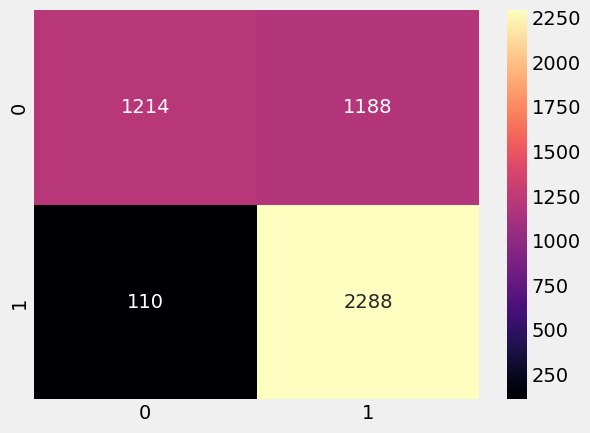

In [6]:
from sklearn.naive_bayes import BernoulliNB

# Apply the model on x_train
BNBmodel = BernoulliNB(alpha = 1)
BNBmodel.fit(x_train_tdidf, y_train.astype('int'))

# Apply on the test
y_pred = BNBmodel.predict(x_test_tdidf)


# Evaluate the model
acc_score = accuracy_score(y_test.astype('int'), y_pred)
print("TEST SET - Accuracy Score (Params: TD-IDF / BNB) : ", round(acc_score * 100, 2),"%" )

cf_matrix = confusion_matrix(y_test.astype('int'), y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='magma', fmt='d');
plt.show()


____________

#### MultinomialNB

TEST SET - Accuracy Score (Params: TD-IDF / MNB) :  89.17 %


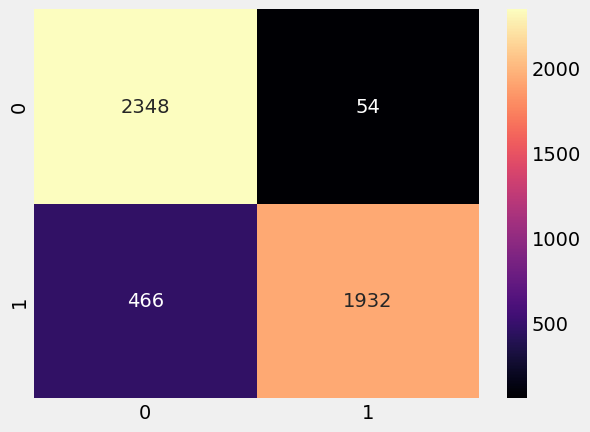

In [7]:
from sklearn.naive_bayes import MultinomialNB

# Apply the model on x_train
MNBmodel = MultinomialNB(alpha = 1)
MNBmodel.fit(x_train_tdidf, y_train.astype('int'))

# Apply on the test
y_pred = MNBmodel.predict(x_test_tdidf)


# Evaluate the model
acc_score = accuracy_score(y_test.astype('int'), y_pred)
print("TEST SET - Accuracy Score (Params: TD-IDF / MNB) : ", round(acc_score * 100, 2),"%" )

cf_matrix = confusion_matrix(y_test.astype('int'), y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='magma', fmt='d');
plt.show()

_______

#### LinearSVC

TEST SET - Accuracy Score (Params: TD-IDF / SVC) :  93.21 %


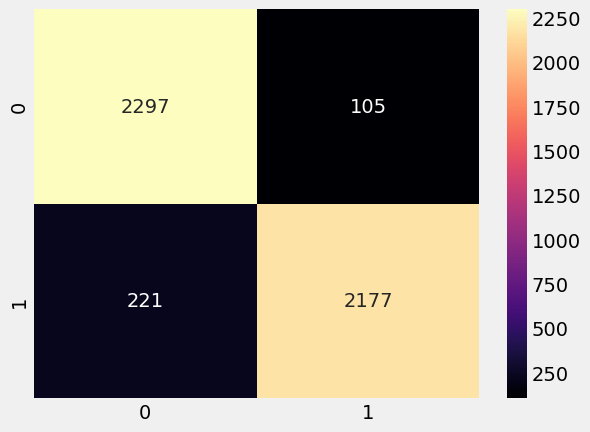

In [7]:
from sklearn.svm import LinearSVC

# Apply the model on x_train
SVCmodel = LinearSVC(penalty='l2', loss='hinge', dual=True)
SVCmodel.fit(x_train_tdidf, y_train.astype('int'))

# Apply on the test
y_pred = SVCmodel.predict(x_test_tdidf)


# Evaluate the model
acc_score = accuracy_score(y_test.astype('int'), y_pred)
print("TEST SET - Accuracy Score (Params: TD-IDF / SVC) : ", round(acc_score * 100, 2),"%" )

cf_matrix = confusion_matrix(y_test.astype('int'), y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='magma', fmt='d');
plt.show()

__________________

### Voting Classifier

TEST SET - Accuracy Score (Voting Classifier) :  93.17 %


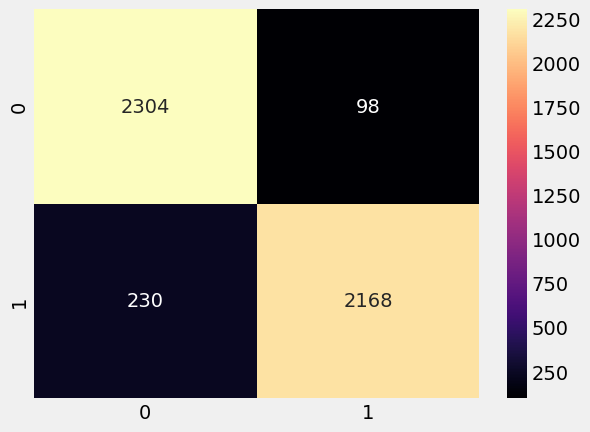

In [9]:
from sklearn.ensemble import VotingClassifier

# Model use for voting
LRmodel = LogisticRegression(C=100, solver='newton-cg', class_weight='balanced')
SVCmodel = LinearSVC(penalty='l2', loss='hinge', dual=True)
MNBmodel = MultinomialNB(alpha = 1)

# Voting Instance
voting = VotingClassifier([('LR', LRmodel),
                           ('SVC', SVCmodel),
                           ('MNB', MNBmodel)],
                           voting = 'hard')

# Apply the VotingClassifier
voting.fit(x_train_tdidf, y_train.astype('int'))

# Apply on the test
y_pred = voting.predict(x_test_tdidf)



# Evaluate the model
acc_score = accuracy_score(y_test.astype('int'), y_pred)
print("TEST SET - Accuracy Score (Voting Classifier) : ", round(acc_score * 100, 2),"%" )

cf_matrix = confusion_matrix(y_test.astype('int'), y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='magma', fmt='d');
plt.show()

______
_____
_____
____

### Other Classifier Tests 

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion='gini', max_depth=50, min_samples_split=20, splitter='best')

model_tree.fit(x_train_tdidf, y_train.astype('int'))

# Apply on the test
y_pred = model_tree.predict(x_test_tdidf)

# Evaluate the model
acc_score = accuracy_score(y_test.astype('int'), y_pred)
print("TEST SET - Accuracy Score (Decision Tree) : ", round(acc_score * 100, 2),"%" )

TEST SET - Accuracy Score (Decision Tree) :  80.52 %


TEST SET - Accuracy Score (Voting Classifier) :  93.46 %


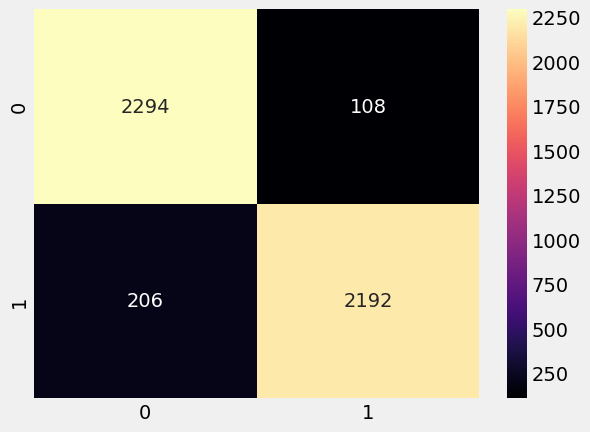

In [8]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

bagging = BaggingClassifier(base_estimator=LinearSVC(penalty='l2', loss='hinge', dual=True),
                          n_estimators=100)

bagging.fit(x_train_tdidf, y_train.astype('int'))
y_pred = bagging.predict(x_test_tdidf)

# Evaluate the model
acc_score = accuracy_score(y_test.astype('int'), y_pred)
print("TEST SET - Accuracy Score (Voting Classifier) : ", round(acc_score * 100, 2),"%" )

cf_matrix = confusion_matrix(y_test.astype('int'), y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='magma', fmt='d');
plt.show()

In [12]:
RFmodel = RandomForestClassifier(n_estimators=100, max_depth=20)

RFmodel.fit(x_train_tdidf, y_train.astype('int'))
y_pred = RFmodel.predict(x_test_tdidf)
acc_score = accuracy_score(y_test.astype('int'), y_pred)
print("TEST SET - Accuracy Score (Bagging) : ", round(acc_score * 100, 2),"%" )

TEST SET - Accuracy Score (Bagging) :  81.75 %


In [13]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

boost = AdaBoostClassifier(n_estimators=100)
boost.fit(x_train_tdidf, y_train.astype('int'))

y_pred = boost.predict(x_test_tdidf)

acc_score = accuracy_score(y_test.astype('int'), y_pred)
print("TEST SET - Accuracy Score (Bagging) : ", round(acc_score * 100, 2),"%" )

TEST SET - Accuracy Score (Bagging) :  85.42 %


-------------------------------
-------------------------------

<center><i>Pas de data augmentation, car le set contient à peu prêt le même nombre de commentaires positifs (12K) et négatifs (12K)</i></center>
<center><i>Par conséquent cela n'améliorerait pas le modèle actuel</i></center>


______________
______________

</br>
<center><h2>Joblib Saving</h2></center>

In [14]:
# nlp_model = {
#     'model' :  bagging,
#     'vectorizer' : tdidf
# }

# joblib.dump(nlp_model, 'nlp_sent_analysis.joblib')

['nlp_sent_analysis.joblib']

_______________
_______________

<center><h2>The End</h2></center>

<center><i>Maintenant que notre modèle est préparé, il st dorénavant exploitable sur notre site web en Flask</i></center>
